# Titanic Disaster Classification

## Problem Statement: To predict the Survival of passengers using dataset provided by Kaggle with respect to different case scenarios

## Importing libraries and datasets 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import plotly.express as px

In [2]:
test=pd.read_csv(r'C:\mahua\Projects\Bharat Intern\test_titanic.csv')
train=pd.read_csv(r'C:\mahua\Projects\Bharat Intern\train_titanic.csv')

train['Testing']=1
test['Testing']=0


In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Testing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Testing      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Testing
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
train.shape

(891, 13)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Testing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Testing
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1


In [9]:
size=len(train)
size

891

## Graphical Representations

### Number of People surviving the disaster 

In [10]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

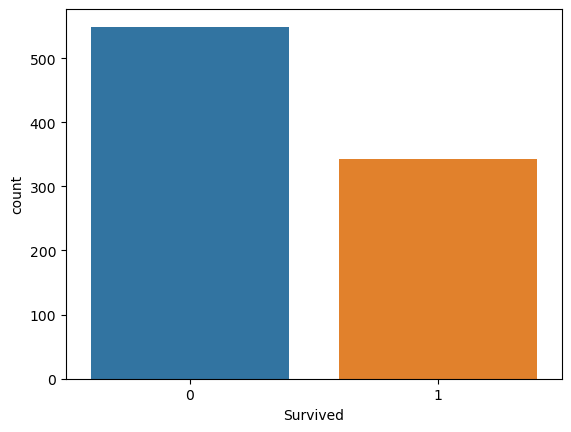

In [11]:
sns.countplot(x='Survived',data=train)

### Survival on basis of Gender 

In [12]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

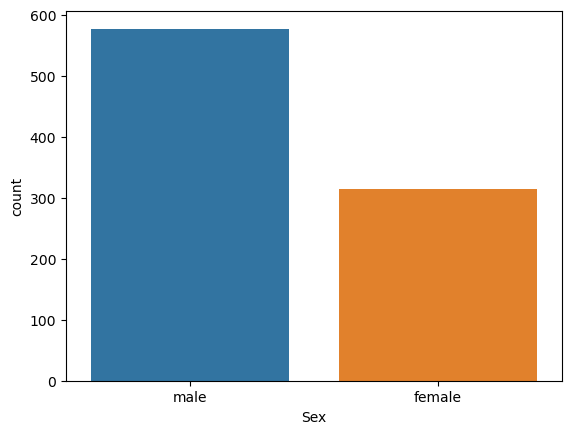

In [13]:
sns.countplot(x='Sex',data=train)

<Axes: xlabel='Sex', ylabel='Survived'>

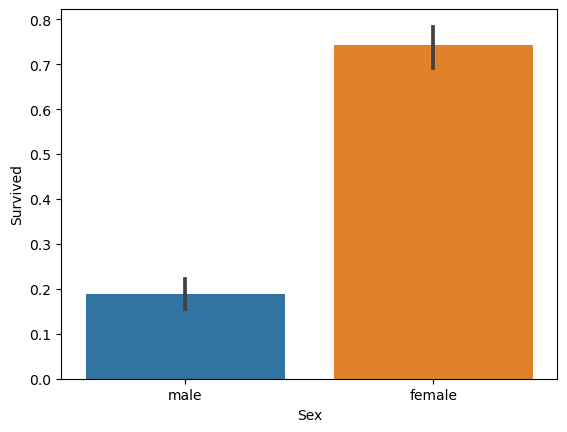

In [14]:
sns.barplot(data=train,x='Sex',y='Survived')

<Axes: xlabel='Sex'>

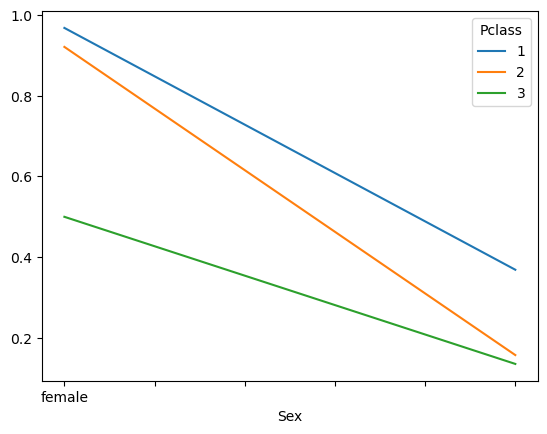

In [15]:
train.pivot_table('Survived',index='Sex',columns='Pclass').plot()

#### As per the observation number of women surviving the disaster is more  

### Survival on basis of Class 

In [16]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

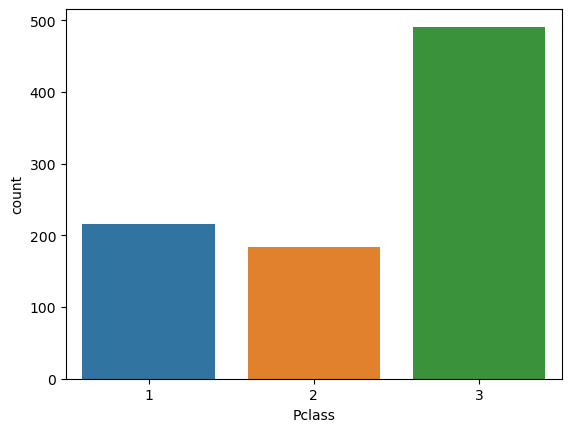

In [17]:
sns.countplot(x='Pclass',data=train)

<Axes: xlabel='Pclass', ylabel='Survived'>

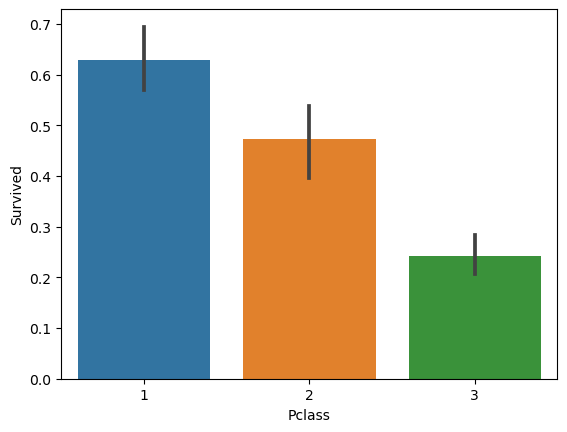

In [18]:
sns.barplot(data=train,x='Pclass',y='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

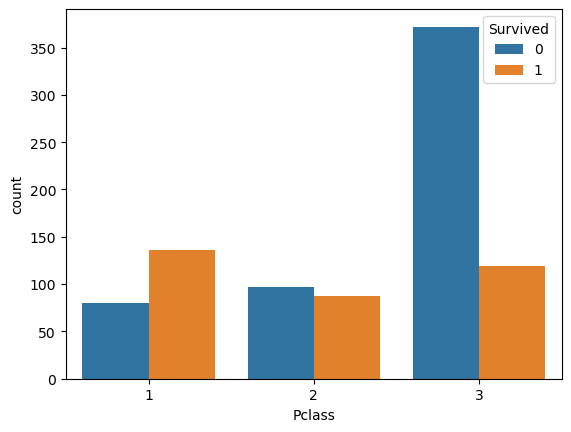

In [19]:
sns.countplot(data=train,x='Pclass',hue='Survived')

#### The Pclass in the dataset tells about the Socio-economic status of the people in the Ship. The one with Pclass=1 are the upper class and Pclass=2 being middle class and Pclass=3 lower class. 
#### As per the observation number of upper class surviving is high whereas the survival of lower class is lowest.

### Survival with respect to Age

<Axes: xlabel='Age', ylabel='Count'>

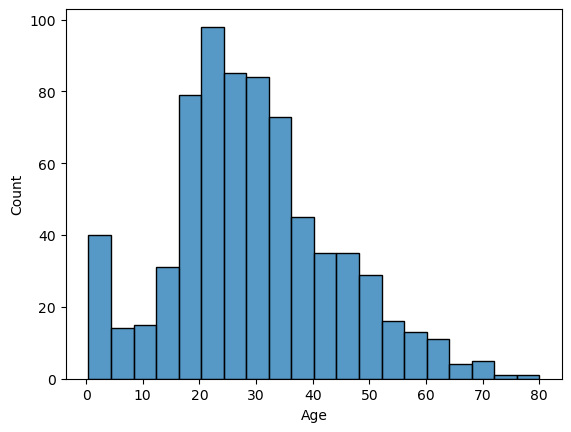

In [20]:
sns.histplot(train['Age'].dropna())

#### As per the above graph people between age of around 19 -- 25 are most in number

In [21]:
df=train[train['Age']<=12]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Testing
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,1
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,1
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S,1
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,1
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,1
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S,1
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C,1


<Axes: xlabel='Age', ylabel='count'>

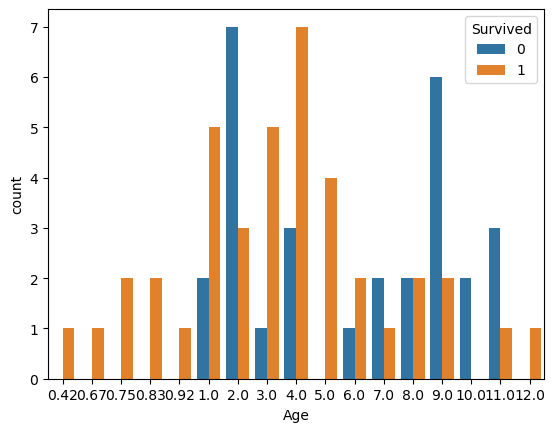

In [22]:
sns.countplot(x='Age',hue='Survived',data=df)

#### As per NIH people below age of 12 are considered to be children. Above graph shows that most children survived the disaster 

In [23]:
df1=train[train['Age']>60]
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Testing
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,1
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,1
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,1
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,1
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,1


<Axes: xlabel='Age', ylabel='count'>

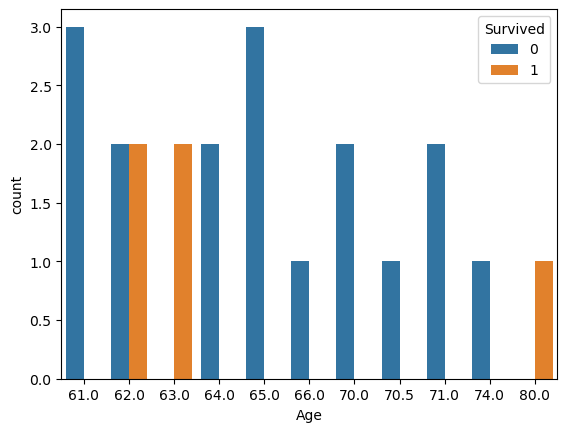

In [24]:
sns.countplot(x='Age',hue='Survived',data=df1)

#### As per NIH people above age of 60 are considered to senior citizens. Above graph shows that only few senior citizens survived the disaster 

### Checking if people travelled alone or with family

#### SibSp is number of siblings or spouse a person travelling had onboard where as Parch is number of parents and children onboard with the traveller

In [25]:
train['Family'] = train.Parch + train.SibSp

In [26]:
train['Is Alone']=train.Family==0

In [27]:
td=train[train['Is Alone']==True]
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Testing,Family,Is Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,True
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,True
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1,0,True
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,True


In [28]:
len(td)

537

#### Above distributed dataset tells about people travelling alone, which is 537.

<Axes: xlabel='Is Alone', ylabel='count'>

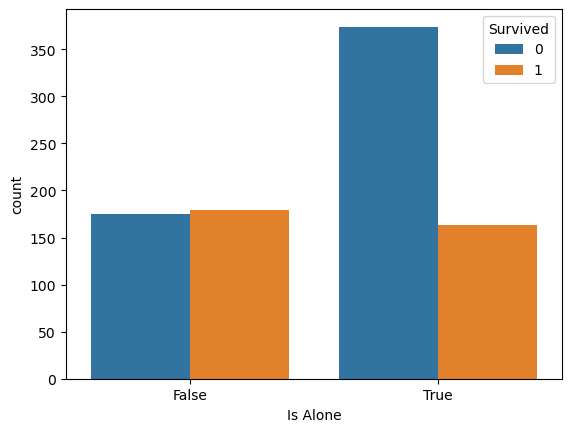

In [29]:
sns.countplot(x='Is Alone',hue='Survived',data=train)

#### The graph is plotted on the basis of People surviving the disaster who are travelling alone based on Gender.                                                The graph clearly shows that out of people who travelled alone not many survived the disaster.

### Survival on the basis of fare price paid

#### Fare will be segregated into three categories Low, Mid and High. It would be obvious that the person who will pay more will have higher chances to survive the disaster

In [30]:
train['Fare_Category']=pd.cut(train['Fare'],bins=[0,7.90,31.28,150],labels=['Low','Mid','High'])

In [31]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Testing,Family,Is Alone,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,False,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,False,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,True,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,False,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,True,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,True,Mid
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,True,Mid
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,3,False,Mid
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,True,Mid


In [32]:
dlow=train[train['Fare_Category']=='Low']
dlow

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Testing,Family,Is Alone,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,False,Low
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,1,0,True,Low
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,0,True,Low
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,0,True,Low
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,0,True,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,1,0,True,Low
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1,0,True,Low
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,1,0,True,Low
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1,0,True,Low


In [33]:
dmid=train[train['Fare_Category']=='Mid']
dmid

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Testing,Family,Is Alone,Fare_Category
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,True,Mid
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,True,Mid
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0,True,Mid
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,4,False,Mid
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,2,False,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1,5,False,Mid
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,True,Mid
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,True,Mid
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,3,False,Mid


In [34]:
dhigh=train[train['Fare_Category']=='High']
dhigh

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Testing,Family,Is Alone,Fare_Category
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,False,High
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,False,High
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,True,High
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1,0,True,High
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,6,False,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,1,1,False,High
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,1,10,False,High
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,1,0,True,High
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1,2,False,High


<Axes: xlabel='Fare_Category', ylabel='count'>

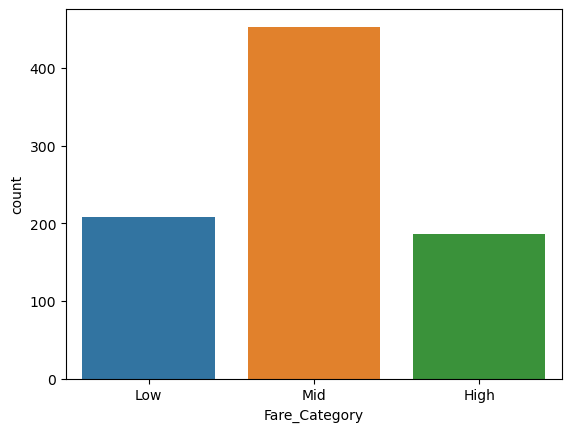

In [35]:
sns.countplot(x='Fare_Category',data=train)

#### Above datasets show the Fare_Category of people paying for the ship journey. The dataset shows that the minority belonged to higher fare_category.
#### This proves that majority people belonged to lower and mid income group and a small group of around 10% of population belonged to higher income groups.

<Axes: xlabel='Fare_Category', ylabel='count'>

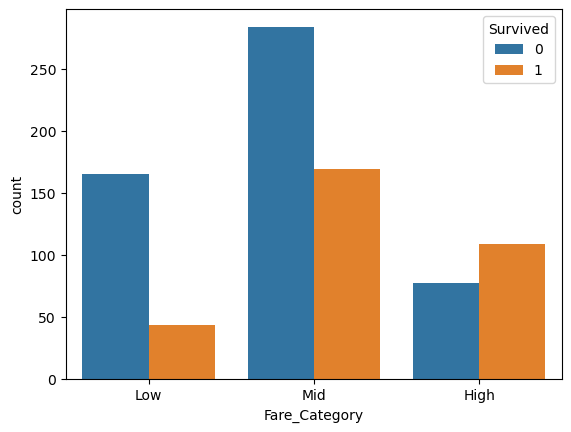

In [36]:
sns.countplot(x='Fare_Category',hue='Survived',data=train)

#### The graph shows that out of different Fare_Category people who paid more had higher chances to survive the disaster and the ones who paid less had lower chance to survive.

### Prediction of survival on basis of Embark

#### Embarked means where Traveler mounted i.e boarded onto the ship from. As per the dataset there are 3 possible places for embark - Southampton,Cherbourg and Queenstown.

<Axes: xlabel='Embarked', ylabel='count'>

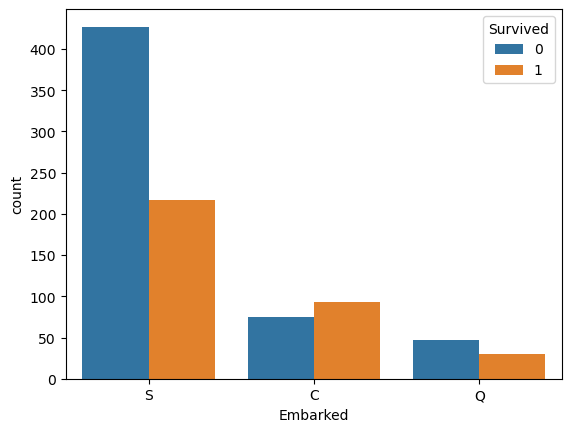

In [37]:
sns.countplot(x='Embarked',hue='Survived',data=train)

#### More than 70% of the people boarded from Southampton. Under 20% boarded from Cherbourg and the rest boarded from Queenstown. 
#### People who boarded from Cherbourg had a higher chance of survival than people who boarded from Southampton or Queenstown.

### Checking whether Captain survived the disaster

In [38]:
train[train['Name'].str.contains('Capt')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Testing,Family,Is Alone,Fare_Category
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,1,2,False,High


The captain goes down with the ship is a maritime tradition that a sea captain holds ultimate responsibility for both their ship and everyone embarked on it. The Captain is the last one to get down from the ship in case of accidents. And if the ship is drowning and not everyone is saved till then, The captain goes with the sinking ship

## EDA

### Handling the missing values 

In [39]:
train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Testing            0
Family             0
Is Alone           0
Fare_Category     44
dtype: int64

<Axes: >

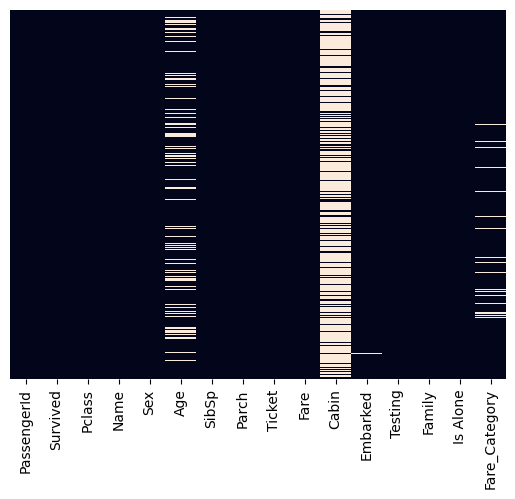

In [40]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

### Data Cleaning

#### Age and Cabin column have lot many Non Applicable  values, i.e. Missing values hence handling them is a priority

<Axes: xlabel='Pclass', ylabel='Age'>

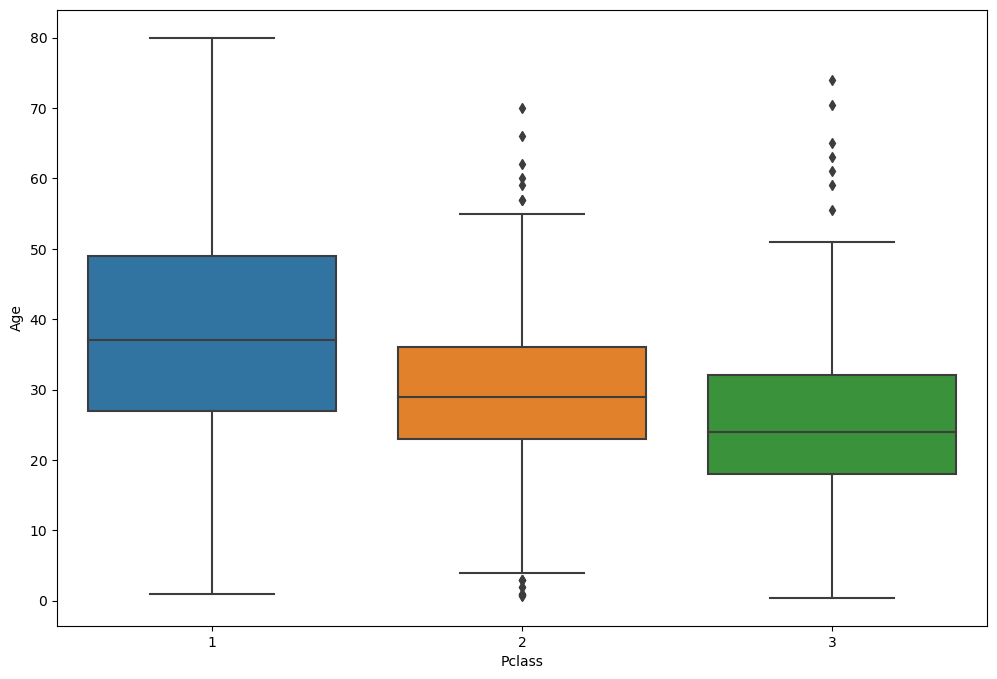

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=train)

### Data Imputation
#### Impute average age based on PClass.    Pclass 1 == 37 , PClass 2 == 29 , PClass ==  24

In [42]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [43]:
train['Age']=train[['Age','Pclass']].apply(impute_age, axis=1)

In [44]:
train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Testing            0
Family             0
Is Alone           0
Fare_Category     44
dtype: int64

#### Now there are no more Null Values in column 'Age'.

#### Dropping Columns that are further not needed for the prediction 

In [45]:
train.drop(['Pclass','Cabin','Name','Is Alone','Fare_Category','Ticket','PassengerId'],axis=1 , inplace=True)

In [46]:
train.isna().sum()

Survived    0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Testing     0
Family      0
dtype: int64

In [47]:
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Testing,Family
0,0,male,22.0,1,0,7.2500,S,1,1
1,1,female,38.0,1,0,71.2833,C,1,1
2,1,female,26.0,0,0,7.9250,S,1,0
3,1,female,35.0,1,0,53.1000,S,1,1
4,0,male,35.0,0,0,8.0500,S,1,0


### Encoding

In [48]:
Sex=pd.get_dummies(train.Sex,drop_first = True)
Embark=pd.get_dummies(train.Embarked,drop_first=True)

In [49]:
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [50]:
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Testing,Family
0,0,male,22.0,1,0,7.2500,S,1,1
1,1,female,38.0,1,0,71.2833,C,1,1
2,1,female,26.0,0,0,7.9250,S,1,0
3,1,female,35.0,1,0,53.1000,S,1,1
4,0,male,35.0,0,0,8.0500,S,1,0


In [51]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [52]:
train_full=pd.concat([train,Sex,Embark],axis=1)

In [53]:
train_full

,Survived,Age,SibSp,Parch,Fare,Testing,Family,male,Q,S
0,0,22.0,1,0,7.2500,1,1,1,0,1
1,1,38.0,1,0,71.2833,1,1,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,24.0,1,2,23.4500,1,3,0,0,1
889,1,26.0,0,0,30.0000,1,0,1,0,0


In [54]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Logistic Regression Model 

In [56]:
lgm=LogisticRegression()

lgm.fit(x_train,y_train)

LogisticRegression()

In [57]:
lgm_pred = lgm.predict(x_test)

In [58]:
print(classification_report(y_test,lgm_pred))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       105
           1       0.82      0.31      0.45        74

    accuracy                           0.69       179
   macro avg       0.74      0.63      0.62       179
weighted avg       0.73      0.69      0.64       179



In [59]:
score=round(lgm.score(x_train,y_train)*100,2)
print(round(score,2,),"%")

68.4 %


## Decision Tree Classifier

In [60]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
dtc_pred=dtc.predict(x_test)

In [62]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       105
           1       0.60      0.49      0.54        74

    accuracy                           0.65       179
   macro avg       0.64      0.63      0.63       179
weighted avg       0.65      0.65      0.65       179



In [63]:
score=round(dtc.score(x_train,y_train)*100,2)
print(round(score,2,),"%")

95.93 %


## Random Forest Classifier 

In [64]:
rfc=RandomForestClassifier()

In [65]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
rfc_pred=rfc.predict(x_test)

In [67]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       105
           1       0.72      0.70      0.71        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.76      0.77      0.76       179



In [68]:
score=round(rfc.score(x_train,y_train)*100,2)
print(round(score,2,),"%")

95.93 %


### Conclusion:
#### Higher score is obtained using Random Forest Classifier and Decision Tree Classifier. However accuracy of Logistic Regression is higher than Decision Tree Classifier.
#### However Random Forest Classifier proves to be the best model. Random Forest model is less prone to overfitting than Decision tree, and gives a more generalized solution. Random Forest is more robust and accurate than Decision Trees